# import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn.svm import SVC
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset

In [4]:
credit=pd.read_csv("credit card.csv")
print(credit)


     Time        V1        V2        V3        V4        V5        V6  \
0       0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1       0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5       2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6       4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7       7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8       7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9       9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10     10  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11     10  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12     10  1.249999 -1.221637  0.383930 -1.234899 -

In [5]:
credit.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit['Class'].value_counts()

0    349
1    150
Name: Class, dtype: int64

In [8]:
credit.shape


(499, 31)

In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 31 columns):
Time      499 non-null int64
V1        499 non-null float64
V2        499 non-null float64
V3        499 non-null float64
V4        499 non-null float64
V5        499 non-null float64
V6        499 non-null float64
V7        499 non-null float64
V8        499 non-null float64
V9        499 non-null float64
V10       499 non-null float64
V11       499 non-null float64
V12       499 non-null float64
V13       499 non-null float64
V14       499 non-null float64
V15       499 non-null float64
V16       499 non-null float64
V17       499 non-null float64
V18       499 non-null float64
V19       499 non-null float64
V20       499 non-null float64
V21       499 non-null float64
V22       499 non-null float64
V23       499 non-null float64
V24       499 non-null float64
V25       499 non-null float64
V26       499 non-null float64
V27       499 non-null float64
V28       499 non-null float6

In [10]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,...,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,176.653307,-0.165175,0.188060,0.867869,0.369593,0.031562,0.255691,0.107006,-0.046650,-0.015304,...,-0.004524,-0.102430,-0.033422,0.009845,0.131808,0.003991,0.019237,-0.019274,69.854910,0.300601
std,107.795592,1.363333,1.241014,1.046454,1.256478,1.197020,1.301580,0.860295,0.826482,0.863053,...,0.565772,0.619934,0.382217,0.644791,0.426045,0.464336,0.332704,0.296082,218.098539,0.458980
min,0.000000,-6.093248,-12.114213,-5.694973,-4.515824,-6.631951,-3.498447,-4.925568,-7.494658,-2.517037,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.733887,0.000000,0.000000
25%,78.000000,-0.905524,-0.169540,0.309517,-0.384245,-0.576492,-0.580462,-0.308657,-0.157211,-0.479334,...,-0.224660,-0.533028,-0.165549,-0.384946,-0.132890,-0.316839,-0.044722,-0.014552,6.070000,0.000000
50%,169.000000,-0.351287,0.267631,0.880670,0.519230,-0.092158,-0.007311,0.104291,0.059298,-0.056085,...,-0.062742,-0.063521,-0.045268,0.107632,0.152701,-0.063753,0.021368,0.022797,18.310000,0.000000
75%,272.500000,1.110786,0.865268,1.513799,1.160191,0.520926,0.532990,0.554937,0.277493,0.393619,...,0.098102,0.314946,0.073547,0.436535,0.446576,0.226908,0.108402,0.086629,60.590000,1.000000
max,367.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.436633,...,4.332858,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


In [11]:
# separating the data for analysis
legit=credit[credit.Class==0]
fraud=credit[credit.Class==1]

In [12]:
len(legit)

349

In [13]:
len(fraud)

150

In [14]:
print(legit.shape)
print(fraud.shape)

(349, 31)
(150, 31)


In [15]:
legit.Amount.describe()

count     349.000000
mean       77.438883
std       253.099235
min         0.750000
25%         6.240000
50%        19.770000
75%        61.180000
max      3828.040000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count    150.000000
mean      52.209533
std       94.441688
min        0.000000
25%        5.592500
50%       14.750000
75%       58.940000
max      611.760000
Name: Amount, dtype: float64

In [17]:
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,119.716332,-0.255179,0.223818,0.855993,0.371846,0.044439,0.357668,0.164888,-0.004012,0.001001,...,0.044639,0.025461,-0.078003,-0.045103,-0.008126,0.127211,-0.015410,0.018851,-0.022805,77.438883
1,309.126667,0.044234,0.104863,0.895499,0.364352,0.001603,0.018424,-0.027665,-0.145856,-0.053240,...,0.064438,-0.074290,-0.159262,-0.006246,0.051657,0.142504,0.049129,0.020135,-0.011059,52.209533


In [18]:
x=credit['V11'].values
y=credit['V12'].values
x
y

array([-6.17800856e-01,  1.06523531e+00,  6.60836850e-02,  1.78228226e-01,
        5.38195550e-01,  3.59893837e-01, -1.53825826e-01,  2.91474353e-01,
       -1.10452262e-01,  8.36389570e-01, -6.71439778e-01, -3.26143234e-01,
       -2.42681999e-01,  3.23387245e-01,  7.92943952e-01, -7.70406729e-01,
        9.36707715e-01,  2.77192107e-01,  9.70116716e-01, -6.32046515e-01,
        1.29832870e+00,  4.06773576e-01, -5.31377250e-01,  5.24933232e-01,
       -2.15745003e-01, -1.80523156e-01,  9.79350376e-01, -1.11315775e-01,
        7.86796316e-01,  1.00561836e+00,  5.27106061e-01,  6.26699002e-01,
        8.51635860e-01,  8.51635860e-01,  8.53447435e-01,  8.53447435e-01,
       -1.83524462e-01,  1.09638567e+00,  1.25371969e+00,  1.28633962e+00,
        2.29981350e-01,  1.26504922e+00,  3.98299277e-01,  9.53561030e-01,
       -5.02910879e-01,  1.12430422e+00,  5.65325500e-02,  6.80906259e-01,
        4.25595120e-02,  5.89857529e-01,  1.31413105e+00, -6.31560500e-02,
       -9.77627100e-02, -

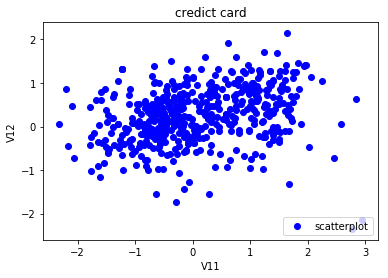

(499,)
(499,)


In [19]:
plt.scatter(x,y,color='blue',label='scatterplot')
plt.title("credict card")
plt.xlabel('V11')
plt.ylabel('V12')
plt.legend(loc=4)
plt.show()
print(x.shape)
print(y.shape)



In [20]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)
print(x.shape)
print(y.shape)

(499, 1)
(499, 1)


# Split the dataset

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


(334, 1)
(334, 1)
(165, 1)


# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression,LogisticRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
a=lm.coef_
b=lm.intercept_
print("Estimated model slope,a:",a)
print("Estimated model slope,b:",b)
lm.predict(x)[0:10]



Estimated model slope,a: [[0.17422781]]
Estimated model slope,b: [0.24791783]


array([[0.15181386],
       [0.52889967],
       [0.35672336],
       [0.20845745],
       [0.10455572],
       [0.48160297],
       [0.00105319],
       [0.13998932],
       [0.12506692],
       [0.42521458]])

In [23]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Rmse value:{:.4f}".format(rmse))


Rmse value:0.6318


In [24]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())
y_test.mean()
#y_test_mean
#r2_score(y_test,y_test_mean)
#r2_score(y_test,y_test)

0.2680966729939394

# Logistic Regression


In [25]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
# last 5 rows of the dataset
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
494,365,-0.456586,0.541708,1.331297,0.559447,0.184045,0.612792,0.632759,0.152253,-0.202196,...,-0.134465,-0.316126,-0.072149,-0.749725,-0.039644,0.472098,0.075612,0.099985,74.22,1
495,365,-1.209437,0.949446,-0.429811,-2.640094,2.601387,3.056966,0.473495,0.280729,0.853043,...,-0.214920,-0.449815,-0.088677,1.030439,-0.048967,0.671979,-0.612153,-0.224000,0.68,1
496,366,-1.185698,-0.386510,1.623072,1.636406,1.102506,-0.683317,-0.303337,0.285653,-0.056085,...,0.068753,-0.006952,0.040889,0.040937,0.009224,-0.201042,0.106580,0.140465,9.99,1
497,366,1.020399,-0.639479,0.941568,0.121307,-0.996320,0.177803,-0.589656,0.153583,0.835979,...,-0.140624,-0.341663,-0.060548,0.116672,0.144624,0.932850,-0.049522,0.018131,97.47,1
498,367,1.256217,0.255028,0.277716,0.706677,-0.495831,-1.106735,-0.008493,-0.124504,0.243687,...,-0.303927,-0.943830,0.146551,0.307164,0.169070,0.099129,-0.032095,0.027743,1.29,1


In [27]:
# dataset information
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 31 columns):
Time      499 non-null int64
V1        499 non-null float64
V2        499 non-null float64
V3        499 non-null float64
V4        499 non-null float64
V5        499 non-null float64
V6        499 non-null float64
V7        499 non-null float64
V8        499 non-null float64
V9        499 non-null float64
V10       499 non-null float64
V11       499 non-null float64
V12       499 non-null float64
V13       499 non-null float64
V14       499 non-null float64
V15       499 non-null float64
V16       499 non-null float64
V17       499 non-null float64
V18       499 non-null float64
V19       499 non-null float64
V20       499 non-null float64
V21       499 non-null float64
V22       499 non-null float64
V23       499 non-null float64
V24       499 non-null float64
V25       499 non-null float64
V26       499 non-null float64
V27       499 non-null float64
V28       499 non-null float6

In [28]:
# checking the number of missing values in each column
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
# distribution of legit transactions & fraudulent transactions
credit['Class'].value_counts()

0    349
1    150
Name: Class, dtype: int64

In [30]:
# separating the data for analysis
legit=credit[credit.Class==0]
fraud=credit[credit.Class==1]

In [31]:
print(legit.shape)
print(fraud.shape)

(349, 31)
(150, 31)


In [32]:
# statistical measures of the data
legit.Amount.describe()

count     349.000000
mean       77.438883
std       253.099235
min         0.750000
25%         6.240000
50%        19.770000
75%        61.180000
max      3828.040000
Name: Amount, dtype: float64

In [33]:
fraud.Amount.describe()

count    150.000000
mean      52.209533
std       94.441688
min        0.000000
25%        5.592500
50%       14.750000
75%       58.940000
max      611.760000
Name: Amount, dtype: float64

In [34]:
# compare the values for both transactions
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,119.716332,-0.255179,0.223818,0.855993,0.371846,0.044439,0.357668,0.164888,-0.004012,0.001001,...,0.044639,0.025461,-0.078003,-0.045103,-0.008126,0.127211,-0.015410,0.018851,-0.022805,77.438883
1,309.126667,0.044234,0.104863,0.895499,0.364352,0.001603,0.018424,-0.027665,-0.145856,-0.053240,...,0.064438,-0.074290,-0.159262,-0.006246,0.051657,0.142504,0.049129,0.020135,-0.011059,52.209533


In [35]:
legit_sample=legit.sample(n=150)

In [36]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [37]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
309,222,1.086971,0.045122,0.475774,1.344244,-0.302641,0.004408,-0.096404,0.182898,0.193464,...,-0.044044,-0.007869,-0.044243,0.213380,0.562625,-0.340026,0.026737,0.007185,18.61,0
44,34,-0.762256,0.127768,2.650056,-1.875663,-0.893356,-0.268715,-0.419864,0.146233,-0.869635,...,0.433350,1.260403,-0.404700,0.094946,0.480976,-0.090685,0.319223,0.135600,15.99,0
219,145,1.122579,0.222573,0.481928,1.131375,-0.214947,-0.201283,-0.056556,0.087471,-0.250570,...,0.163223,0.492048,-0.068450,0.233485,0.532600,-0.281097,0.028326,0.010990,9.90,0
57,39,-1.330882,0.267540,-0.168470,-0.701232,3.281972,3.216390,-0.059394,0.895430,-0.017779,...,-0.151042,-0.311726,-0.374793,1.014886,0.353992,-0.510327,0.159033,0.228708,13.84,0
198,131,-1.007391,1.261943,1.207203,1.307575,0.153211,0.062291,0.508647,0.079447,-0.395211,...,0.039150,0.411661,-0.080320,0.121235,-0.133000,-0.303177,-0.463913,-0.164157,10.00,0


In [38]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
494,365,-0.456586,0.541708,1.331297,0.559447,0.184045,0.612792,0.632759,0.152253,-0.202196,...,-0.134465,-0.316126,-0.072149,-0.749725,-0.039644,0.472098,0.075612,0.099985,74.22,1
495,365,-1.209437,0.949446,-0.429811,-2.640094,2.601387,3.056966,0.473495,0.280729,0.853043,...,-0.214920,-0.449815,-0.088677,1.030439,-0.048967,0.671979,-0.612153,-0.224000,0.68,1
496,366,-1.185698,-0.386510,1.623072,1.636406,1.102506,-0.683317,-0.303337,0.285653,-0.056085,...,0.068753,-0.006952,0.040889,0.040937,0.009224,-0.201042,0.106580,0.140465,9.99,1
497,366,1.020399,-0.639479,0.941568,0.121307,-0.996320,0.177803,-0.589656,0.153583,0.835979,...,-0.140624,-0.341663,-0.060548,0.116672,0.144624,0.932850,-0.049522,0.018131,97.47,1
498,367,1.256217,0.255028,0.277716,0.706677,-0.495831,-1.106735,-0.008493,-0.124504,0.243687,...,-0.303927,-0.943830,0.146551,0.307164,0.169070,0.099129,-0.032095,0.027743,1.29,1


In [39]:
new_dataset['Class'].value_counts()

1    150
0    150
Name: Class, dtype: int64

In [40]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,114.586667,-0.321746,0.242634,0.854651,0.236500,0.156067,0.188073,0.130422,-0.021751,0.078737,...,0.009759,0.026985,-0.072247,-0.046007,0.020666,0.150697,-0.061667,0.034585,-0.022970,54.760200
1,309.126667,0.044234,0.104863,0.895499,0.364352,0.001603,0.018424,-0.027665,-0.145856,-0.053240,...,0.064438,-0.074290,-0.159262,-0.006246,0.051657,0.142504,0.049129,0.020135,-0.011059,52.209533


In [41]:
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']
              
                   

In [42]:
print(x)

     Time        V1        V2        V3        V4        V5        V6  \
309   222  1.086971  0.045122  0.475774  1.344244 -0.302641  0.004408   
44     34 -0.762256  0.127768  2.650056 -1.875663 -0.893356 -0.268715   
219   145  1.122579  0.222573  0.481928  1.131375 -0.214947 -0.201283   
57     39 -1.330882  0.267540 -0.168470 -0.701232  3.281972  3.216390   
198   131 -1.007391  1.261943  1.207203  1.307575  0.153211  0.062291   
272   193 -0.922515  0.841577  2.078000  1.373071  0.666526  0.779012   
99     68  1.232996  0.189454  0.491040  0.633673 -0.511574 -0.990609   
293   209 -0.572011  0.374981  0.923823 -0.954006  0.753635  0.139495   
12     10  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
151    95  1.057021 -0.646956  0.729167 -0.569262 -1.174307 -0.527625   
5       2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
165   105  1.000234 -0.295227  1.308259  1.257753 -0.967532  0.460245   
132    83 -1.864990  0.910874  1.724863 -1.748371  

In [43]:
print(y)

309    0
44     0
219    0
57     0
198    0
272    0
99     0
293    0
12     0
151    0
5      0
165    0
132    0
38     0
323    0
24     0
41     0
87     0
138    0
153    0
185    0
174    0
137    0
225    0
276    0
89     0
179    0
327    0
273    0
257    0
      ..
469    1
470    1
471    1
472    1
473    1
474    1
475    1
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    1
494    1
495    1
496    1
497    1
498    1
Name: Class, Length: 300, dtype: int64


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y,)

In [45]:
print(x.shape, x_train.shape, x_test.shape)

(300, 30) (225, 30) (75, 30)


In [46]:
# training the LogisticRegression model with training data
model=LogisticRegression()
model.fit(x_train,y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
#accuracy on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [48]:
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.9733333333333334


In [49]:
# accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [50]:
print('Accuracy score on Test Data:',test_data_accuracy)

Accuracy score on Test Data: 0.9733333333333334


# Decision Tree

In [203]:
col_names=['Time','V1','V2','V3','V4','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
credit.columns=col_names
col_names

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [204]:
credit.head()

,Time,V1,V2,V3,V4,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [205]:
col_names=['Time','V1','V2','V3','V4','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
for col in col_names:
    print(credit[col].value_counts())
credit['Class'].value_counts()

284    5
209    5
145    5
190    5
140    5
297    4
69     4
73     4
95     4
34     4
103    4
282    4
44     4
265    4
41     4
259    4
74     4
290    4
78     4
26     4
222    4
241    4
23     4
135    3
167    3
204    3
83     3
218    3
199    3
84     3
      ..
274    1
88     1
293    1
97     1
287    1
285    1
100    1
280    1
106    1
107    1
278    1
111    1
275    1
113    1
115    1
139    1
272    1
121    1
270    1
268    1
127    1
263    1
131    1
261    1
133    1
258    1
136    1
137    1
138    1
367    1
Name: Time, Length: 262, dtype: int64
 1.038370    4
-2.419486    2
-0.535388    2
-2.420413    2
-0.529912    2
 1.295406    1
 1.252189    1
 0.803846    1
-0.263380    1
 0.503302    1
-0.827465    1
 1.105768    1
 1.148187    1
 1.198658    1
-0.071004    1
-0.351287    1
 1.081033    1
 0.158332    1
-1.169087    1
 1.431053    1
-1.244126    1
-0.363519    1
-1.782116    1
-0.426030    1
-0.899992    1
-1.063236    1
 0.805682    1
 0.00704

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [206]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [207]:
# check data types in X_train
x_train.dtypes


Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [208]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
216,142,1.288256,0.085828,-1.179482,0.064357,2.195225,3.383363,-0.448437,0.799347,-0.147006,...,-0.015775,0.017485,-0.051355,-0.145480,1.007613,0.833293,-0.265485,0.020539,0.015394,4.90
158,99,-0.883996,-0.150765,2.291791,-0.263452,-0.814535,0.955841,0.097631,0.474047,0.139512,...,0.358751,0.070901,0.051832,0.110298,-0.260629,-0.097549,1.155439,-0.021199,0.062565,142.71
455,333,-2.977214,0.781748,2.881724,-1.627798,-1.368067,1.656876,-1.185053,-5.393736,1.719407,...,-0.879344,3.656428,-1.929181,0.190843,0.533134,0.296773,0.890104,-0.123225,-0.543750,75.00
175,112,1.102698,0.103965,0.934479,1.152704,-0.693597,-0.584580,-0.148439,-0.112031,0.196750,...,0.037095,-0.017211,-0.098781,0.003331,0.394412,0.334208,-0.520700,0.045952,0.048005,54.99
376,273,0.216727,0.710626,1.224876,1.139405,-0.376351,-0.253986,-0.034557,-0.812548,-0.260261,...,-0.214412,0.773476,-0.233609,-0.045366,0.368535,0.675418,-0.286281,0.196730,0.226031,18.00


In [209]:
x = credit.iloc[: , 1:30].values
y = credit.iloc[:, 30].values

In [210]:
print("Input Range : ", x.shape)
print("Output Range : ", y.shape)


Input Range :  (499, 29)
Output Range :  (499,)


In [211]:
print ("Class Labels : \n", y)


Class Labels : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1

Text(0, 0.5, 'No of occurences')

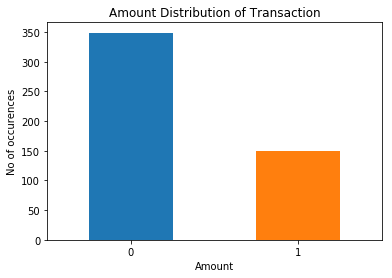

In [212]:
set_class = pd.value_counts(credit['Amount'], sort = True)

set_class.plot(kind = 'bar', rot=0)

plt.title("Amount Distribution of Transaction")

plt.xlabel("Amount")

plt.ylabel("No of occurences")


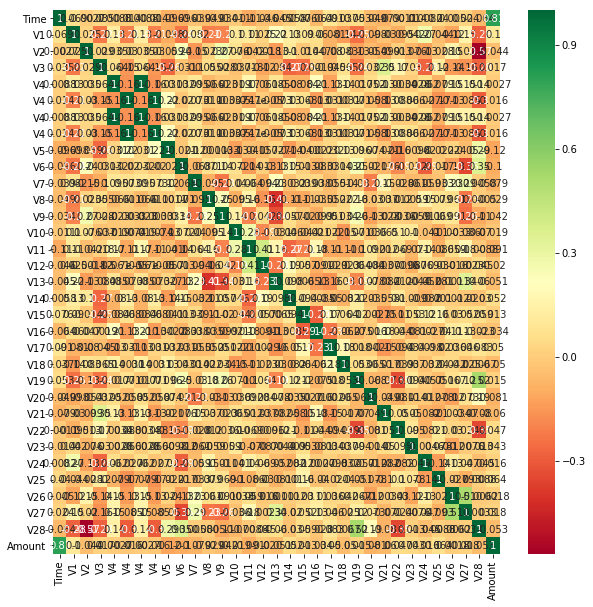

In [213]:
# Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = credit.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(credit[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [214]:
stdsc = StandardScaler()
x_train = stdsc.fit_transform(x_train)
x_test = stdsc.transform(x_test)


In [215]:
print("Training Set after Standardised : \n", x_train[0])


Training Set after Standardised : 
 [-0.64601892  1.08823544 -0.09730622 -2.01401539 -0.25543103  2.09895308
  2.64007369 -0.68215054  1.13441859 -0.16063548  0.14661517 -0.2608981
 -0.34454782  0.05204814  0.88939275  0.90439269  0.8137713  -1.08030753
  0.75107599 -0.05897179 -0.08729543  0.0074029   0.10188831 -0.32422185
  1.54750662  1.62355344 -0.61150022  0.07077006  0.15566872 -0.4398338 ]


In [216]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [217]:
y_pred_decision_tree = dt_classifier.predict(x_test)


In [218]:
com_decision = confusion_matrix(y_test, y_pred_decision_tree)
print("confusion Matrix : \n", com_decision)



confusion Matrix : 
 [[32  0]
 [ 0 43]]


In [219]:
Accuracy_Model = ((com_decision[0][0] + com_decision[1][1]) / com_decision.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Model)

Error_rate_Model= ((com_decision[0][1] + com_decision[1][0]) / com_decision.sum()) *100
print("Error_rate_Decison  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (com_decision[1][1] / (com_decision[1][1] + com_decision[0][1])) *100
print("Specificity_Decison : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0])) *100
print("Sensitivity_Decison : ", Sensitivity_Model)


Accuracy_Decison    :  100.0
Error_rate_Decison  :  0.0
Specificity_Decison :  100.0
Sensitivity_Decison :  100.0


# Support vector machine 

In [220]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [221]:
prediction = classifier.predict(x_test) #And finally, we predict our data test.


In [222]:
class_names=np.array(['0','1']) 

In [223]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score:",accuracy)

Accuracy Score: 0.5066666666666667


# Random Forest

In [224]:
print('Valid transaction',len(credit[credit['Amount']==0]))
print('fraud transaction',len(credit[credit['Amount']==1]))

Valid transaction 349
fraud transaction 150


In [225]:
y= credit['Amount']
x= credit.drop(columns=['Amount'],axis=1)


In [226]:
# fitting randomforest model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [174]:
#model_1
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [175]:
y_pred = classifier.predict(x_test)

In [176]:
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        34

   micro avg       1.00      1.00      1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Confusion matrix:
 [[41  0]
 [ 0 34]]


In [177]:
# calculate accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)


Accuracy 1.0
